In [55]:
import pandas as pd


#read and parse the .csv features file for A1-turbine normalized data
df = pd.read_csv('Normalized Data/A1-turbine_normalized.txt', delimiter = '\t')
df.head()

,#height_over_sea_level,fall,net_fall,flow,power_of_hydroelectrical_turbine
0,0.8462,0.8212,0.8488,0.0833,0.1500
1,0.9487,0.9226,0.9468,0.0833,0.1627
2,0.2821,0.2803,0.2764,0.5833,0.3712
3,0.2051,0.2042,0.2028,0.5833,0.3304
4,1.0000,0.9614,0.9413,0.8333,0.8948


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   #height_over_sea_level            451 non-null    float64
 1   fall                              451 non-null    float64
 2   net_fall                          451 non-null    float64
 3   flow                              451 non-null    float64
 4   power_of_hydroelectrical_turbine  451 non-null    float64
dtypes: float64(5)
memory usage: 17.7 KB


In [57]:
df.describe()

,#height_over_sea_level,fall,net_fall,flow,power_of_hydroelectrical_turbine
count,451.000000,451.000000,451.000000,451.000000,451.000000
mean,0.535221,0.516427,0.523289,0.486881,0.392635
std,0.284318,0.272583,0.271364,0.297155,0.250617
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.307700,0.306350,0.302450,0.250000,0.185400
50%,0.538500,0.508600,0.521500,0.500000,0.360500
75%,0.794900,0.757850,0.760800,0.750000,0.577500
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
columns = df.shape[1]

# construct an array of arrays size (451, 4) for all features input values
inputcolumns = df.columns[0 : 4]
features = df[inputcolumns].values

# construct an array of size (451) for all features target values
outputcolumn = df.columns[4]
targets = df[outputcolumn].values

print(features.shape)
print(targets.shape)

(451, 4)
(451,)


In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.15, random_state= 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(383, 4)
(68, 4)
(383,)
(68,)


In [60]:
import MyNeuralNetwork as NeuralNetwork
import activation_functions as activation

# layers include input layer + hidden layers + output layer
layers = [4, 9, 5, 1]
nn = NeuralNetwork.MyNeuralNetwork(layers,  400, 0.1, 0.9, activation.tanh, 0.2)

# initialize weights with random values
nn.initialize_weights()

# call fit function with features (n_samples,n_features) and targets (n_samples)
nn.fit(x_train, y_train)

print("L = ", nn.L, end="\n")
print("n = ", nn.n, end="\n")

print("xi = ", nn.xi, end="\n")
print("xi[0] = ", nn.xi[0], end="\n")
print("xi[1] = ", nn.xi[1], end="\n")

print("w = ", nn.w, end="\n")
print("w[1] = ", nn.w[1], end="\n")

print(nn.training_error)
print(nn.validation_error)

epoch =  0
epoch =  1
epoch =  2
epoch =  3
epoch =  4
epoch =  5
epoch =  6
epoch =  7
epoch =  8
epoch =  9
epoch =  10
epoch =  11
epoch =  12
epoch =  13
epoch =  14
epoch =  15
epoch =  16
epoch =  17
epoch =  18
epoch =  19
epoch =  20
epoch =  21
epoch =  22
epoch =  23
epoch =  24
epoch =  25
epoch =  26
epoch =  27
epoch =  28
epoch =  29
epoch =  30
epoch =  31
epoch =  32
epoch =  33
epoch =  34
epoch =  35
epoch =  36
epoch =  37
epoch =  38
epoch =  39
epoch =  40
epoch =  41
epoch =  42
epoch =  43
epoch =  44
epoch =  45
epoch =  46
epoch =  47
epoch =  48
epoch =  49
epoch =  50
epoch =  51
epoch =  52
epoch =  53
epoch =  54
epoch =  55
epoch =  56
epoch =  57
epoch =  58
epoch =  59
epoch =  60
epoch =  61
epoch =  62
epoch =  63
epoch =  64
epoch =  65
epoch =  66
epoch =  67
epoch =  68
epoch =  69
epoch =  70
epoch =  71
epoch =  72
epoch =  73
epoch =  74
epoch =  75
epoch =  76
epoch =  77
epoch =  78
epoch =  79
epoch =  80
epoch =  81
epoch =  82
epoch =  83
ep

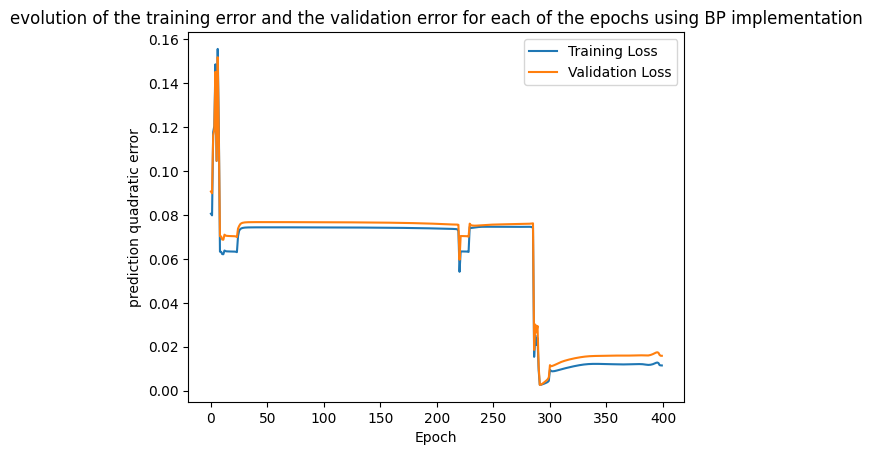

In [61]:
import matplotlib.pyplot as plt

# Plot the evolution of the training and validation loss
plt.plot(nn.training_error[:, 0],nn.training_error[:, 1], label='Training Loss')
plt.plot(nn.validation_error[:, 0], nn.validation_error[:, 1],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('prediction quadratic error')
plt.title('evolution of the training error and the validation error for each of the epochs using BP implementation')
plt.legend()
plt.show()

In [62]:
import numpy as np
# FeedForward all test patterns
num_test_patterns = x_test.shape[0]
num_training_pattern = x_train.shape[0]

y_test_predicted = np.zeros(num_test_patterns)
y_train_predicted = np.zeros(num_training_pattern)

print(len(y_test_predicted))
print(len(y_train_predicted))
for i in range(0 , num_test_patterns):
    y_test_predicted[i] = nn.feedforward(x_test[i])

for i in range(0 , num_training_pattern):
    y_train_predicted[i] = nn.feedforward(x_train[i])

68
383


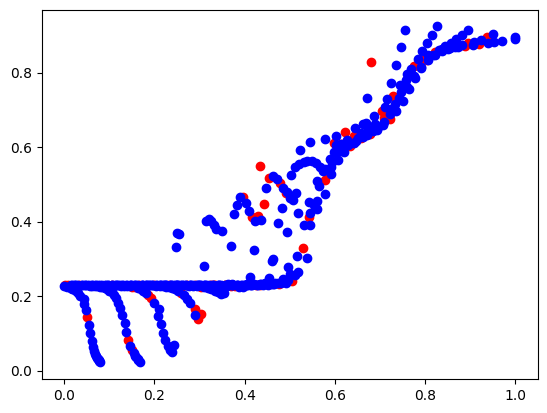

In [63]:
# scatterplot of predicted vs actual values
from matplotlib import pyplot as plt
plt.scatter(y_test, y_test_predicted, color = 'red')
plt.scatter(y_train, y_train_predicted, color = 'blue')